# 1.实战背景

    海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

    1. 不喜欢的人
    2. 魅力一般的人
    3. 极具魅力的人

海伦收集的样本数据主要包含以下3种特征：

    1. 每年获得的飞行常客里程数
    2. 玩视频游戏所消耗时间百分比
    3. 每周消费的冰淇淋公升数

# 2.数据解析

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("./datingTestSet.txt", sep='\t')

In [51]:
data.head(10)

,里程数,百分比,公升数,好感度
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
5,72993,10.141740,1.032955,didntLike
6,35948,6.830792,1.213192,largeDoses
7,42666,13.276369,0.543880,largeDoses
8,67497,8.631577,0.749278,didntLike
9,35483,12.273169,1.508053,largeDoses


In [52]:
len(data)

1000

In [53]:
# 提取前3列
returnMat = data.iloc[:,:3]

In [54]:
# 将数据前三列提取出来，作为特征方程
returnMat = np.matrix(returnMat)

In [55]:
# 对好感度进行分类
class_mapping = {'didntLike':1, 'smallDoses':2, 'largeDoses':3}

In [56]:
data['好感程度'] = data['好感度'].map(class_mapping)

In [57]:
data.head()

,里程数,百分比,公升数,好感度,好感程度
0,40920,8.326976,0.953952,largeDoses,3
1,14488,7.153469,1.673904,smallDoses,2
2,26052,1.441871,0.805124,didntLike,1
3,75136,13.147394,0.428964,didntLike,1
4,38344,1.669788,0.134296,didntLike,1


# 3.数据可视化

In [84]:
#解决无法显示汉字问题
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  


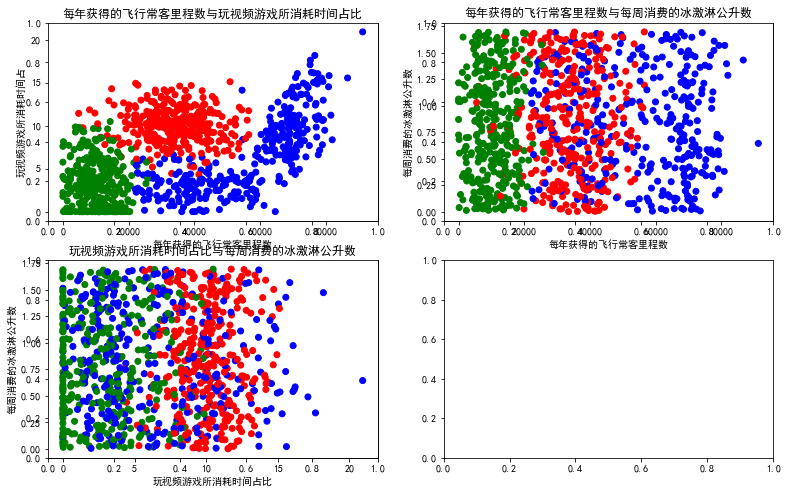

In [92]:
labelcolor = []
for i in data['好感程度']:
    if i == 1:
        labelcolor.append('b')
    if i == 2:
        labelcolor.append('g')  
    if i == 3:
        labelcolor.append('r')
    
fig, ax = plt.subplots(2,2,figsize=(13,8))
ax1 = fig.add_subplot(221)
ax1.set_title('每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
plt.xlabel("每年获得的飞行常客里程数")
plt.ylabel("玩视频游戏所消耗时间占")
ax1.scatter(data.iloc[:,0], data.iloc[:,1],c=labelcolor, marker='o')

ax2 = fig.add_subplot(222)
ax2.set_title("每年获得的飞行常客里程数与每周消费的冰激淋公升数")
plt.xlabel("每年获得的飞行常客里程数")
plt.ylabel("每周消费的冰激淋公升数")
ax2.scatter(data.iloc[:,0], data.iloc[:,2], c=labelcolor, marker='o')

ax3 = fig.add_subplot(223)
ax3.set_title("玩视频游戏所消耗时间占比与每周消费的冰激淋公升数")
plt.xlabel("玩视频游戏所消耗时间占比")
plt.ylabel("每周消费的冰激淋公升数")
ax3.scatter(data.iloc[:,1], data.iloc[:,2], c=labelcolor, marker='o')

# 4.数据归一化

In [102]:
def autoNorm(dataSet):
    # 获取数据的最大、最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大最小值的范围
    ranges = maxVals - minVals
    # 初始化矩阵行列数
    normDataSet = np.zeros(dataSet.shape[0])
    normDataSet = (dataSet - minVals) / ranges
    
    return normDataSet
    

In [123]:
newData = autoNorm(data.iloc[:,0:3]) # 归一化
datingLabels = data['好感程度']
datingLabels

0      3
1      2
2      1
3      1
4      1
      ..
995    2
996    1
997    3
998    3
999    3
Name: 好感程度, Length: 1000, dtype: int64

# 5.测试算法：验证分类器

In [219]:
import operator
"""
函数说明:kNN算法,分类器

Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果

Modify:
    2017-03-24
"""
def classify(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向),行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加,sum(0)列相加,sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方,计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]



In [220]:
def ClassTest(dataSet, labels):
    # 取所有数据的百分之10
    hoRatio = 0.10
    normMat = autoNorm(dataSet)
    # 获取行数
    m = normMat.shape[0]
    # 百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    # 分类错误计数
    errorCount = 0.0
    
    for i in range(numTestVecs):
        # 前面数据用作测试集，后面数据用作训练集
        classifierResult = classify(normMat[i,:], normMat[numTestVecs:m,:], labels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, labels[i]))
        if classifierResult != labels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

In [221]:
data1 = data.iloc[:,0:3]

In [222]:
ClassTest(data1.values, datingLabels.values)

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3